In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Data Sheet.csv")
df.sample(5)

,Composite,Stability,Flow,Density,Air void
37,50,13.03,2.24,1.80,4.13
59,60,14.32,2.44,2.08,3.85
7,55,13.82,2.35,1.98,3.97
12,70,13.75,2.56,2.19,3.61
29,75,13.46,2.93,2.31,3.51


In [3]:
df.dtypes

Composite      int64
Stability    float64
Flow         float64
Density      float64
Air void     float64
dtype: object

In [4]:
df.shape

(99, 5)

In [5]:
cols_to_scale = ['Composite','Stability','Flow','Density','Air void']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df.head()

,Composite,Stability,Flow,Density,Air void
0,1.0,0.053977,1.000000,1.000000,0.000000
1,0.7,0.073864,0.892473,0.968254,0.145833
2,0.6,0.386364,0.870968,0.920635,0.239583
3,0.5,0.704545,0.741935,0.809524,0.354167
4,0.4,0.786932,0.612903,0.619048,0.458333


In [7]:
df.dtypes

Composite    float64
Stability    float64
Flow         float64
Density      float64
Air void     float64
dtype: object

In [8]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Composite: [1.   0.7  0.6  0.5  0.4  0.3  0.2  0.1  0.   0.72 0.64 0.58 0.36 0.34
 0.32 0.68 0.66 0.48 0.44]
Stability: [0.05397727 0.07386364 0.38636364 0.70454545 0.78693182 1.
 0.94886364 0.80681818 0.58238636 0.21590909 0.44318182 0.54261364
 0.82670455 0.84943182 0.89204545 0.         0.38920455 0.58806818
 0.57670455 0.73579545]
Flow: [1.         0.89247312 0.87096774 0.74193548 0.61290323 0.41935484
 0.21505376 0.11827957 0.         0.91397849 0.83870968 0.68817204
 0.34408602 0.44086022 0.48387097 0.51612903 0.94623656 0.88172043
 0.5483871  0.86021505 0.84946237 0.7311828  0.67741935]
Density: [1.         0.96825397 0.92063492 0.80952381 0.61904762 0.55555556
 0.44444444 0.28571429 0.         0.98412698 0.93650794 0.79365079
 0.6984127  0.68253968 0.65079365 0.9047619  0.88888889 0.87301587
 0.77777778 0.74603175]
Air void: [0.         0.14583333 0.23958333 0.35416667 0.45833333 0.63541667
 0.70833333 0.83333333 1.         0.17708333 0.21875    0.30208333
 0.42708333 0.4166666

In [48]:
X = df.iloc[:,1:5]
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [49]:
X_train.shape

(79, 4)

In [50]:
X_test.shape

(20, 4)

In [51]:
X_train[:10]


,Stability,Flow,Density,Air void
50,0.389205,0.860215,0.904762,0.177083
23,0.576705,0.838710,0.873016,0.197917
28,0.386364,0.870968,0.920635,0.239583
85,0.735795,0.731183,0.777778,0.208333
20,0.000000,0.860215,0.936508,0.166667
35,0.582386,0.000000,0.000000,1.000000
6,0.948864,0.215054,0.444444,0.708333
3,0.704545,0.741935,0.809524,0.354167
43,0.786932,0.344086,0.619048,0.458333
12,0.786932,0.344086,0.619048,0.458333


In [52]:
len(X_train.columns)

4

In [53]:
y_train

50    0.66
23    0.64
28    0.60
85    0.48
20    0.68
      ... 
79    0.50
87    0.66
67    0.34
24    0.48
8     0.00
Name: Composite, Length: 79, dtype: float64

In [54]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.0380
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.0253
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.0253
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.0253
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.0253
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.0253
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.0253
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.0253
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.0253
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.0253
Epoch 11/100
3/3 [===========

In [55]:
model.evaluate(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.0633


[0.6588780283927917, 0.06329113990068436]

In [61]:
yp = model.predict(X_test)
yp[:5]

array([[0.53971744],
       [0.60646874],
       [0.56201947],
       [0.56055975],
       [0.6235173 ]], dtype=float32)

In [62]:
yt = []
yt.extend(y_test)
yt[:5]

[0.5, 0.6000000000000001, 0.6799999999999999, 0.5, 0.72]

In [63]:
y_pred = []
for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred_1 = []
for i in yt:
    if i > 0.5:
        y_pred_1.append(1)
    else:
        y_pred_1.append(0)

In [64]:
y_pred[:5]

[1, 1, 1, 1, 1]

In [65]:
y_pred_1[:5]

[0, 1, 1, 0, 1]

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_pred_1,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.72      1.00      0.84        13

    accuracy                           0.75        20
   macro avg       0.86      0.64      0.64        20
weighted avg       0.82      0.75      0.70        20



Text(69.0, 0.5, 'Truth')

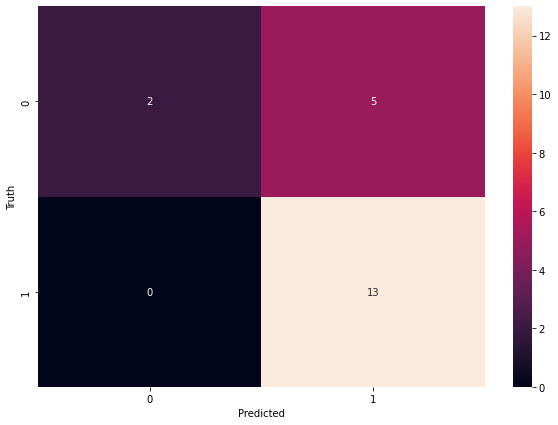

In [67]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_pred_1,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')